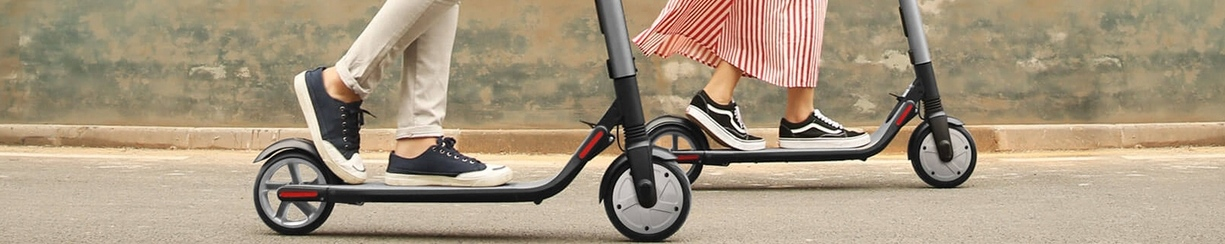

Введение:
    
Нам дан сервис аренды самокатов GoFast и переданы данные о его работе.  В трех разных таблицах информация о некоторых пользователях из нескольких городов, а также об их поездках. Необходимо проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.

Известно, что пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться согласно двум тарифам:



| Тариф                 | стоимость одной минуты поездки, руб |стоимость старта (начала поездки), руб | абонентская плата, мес |
|-----------------------|-------------------------------------|---------------------------------------|------------------------|
| Без подписки Free     |     8                               |        50                             |     0                  |
| С подпиской Ultra     |     6                               |         0                             |   199                  |


Описание данных:
    
В основных данных есть информация о пользователях, их поездках и подписках.

Пользователи — users_go.csv

user_id - уникальный идентификатор пользователя
name - имя пользователя
age	- возраст
city - город
subscription_type - тип подписки (free, ultra)

Поездки — rides_go.csv

user_id	 - уникальный идентификатор пользователя
distance - расстояние, которое пользователь проехал в текущей сессии (в метрах)
duration - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
date - дата совершения поездки

Подписки — subscriptions_go.csv

subscription_type - тип подписки
minute_price - стоимость одной минуты поездки по данной подписке
start_ride_price - стоимость начала поездки
subscription_fee -стоимость ежемесячного платежа

План аналитического разбора:

1. Загрузка данных
2. Предобработка данных, поиск пропусков и дубликатов. Приведение стоблцов к нужному типу.
3. Исследовательский анализ данных согласно заданию.
4. Объединение данных согласно заданию.
5. Подсчет выручки согласно заданию.
6. Проверка гипотез и ответы на вопросы по заданию.
7. Выполнение дополнительного задания (возможно).
8. Выводы.
    

In [1]:
#  подключаем необходимые для разбора библиотеки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

#### Шаг 1. Загрузка данных

Откроем данные и изучим их содержание

In [2]:
# посмотрим данные из файла "users_go.csv"

data_users = pd.read_csv('/datasets/users_go.csv', sep=',')

data_users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [3]:
# общая информация о датасете data_users

data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


Вывод: База содержит данные о 1565 пользователях, нулевых значений нет. Наименования столбцов логичные с правильным написанием, типы данных соответствуют.

In [4]:
# посмотрим данные из файла "rides_go.csv"

data_rides = pd.read_csv('/datasets/rides_go.csv')

data_rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [5]:
# общая информация о датасете data_rides

data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


Вывод: База содержит данные о 18068 поездках, нулевых значений нет. Наименования столбцов логичные с правильным написанием, типы данных соответствуют, кроме столбца date -  необходимо будет привести данные к нужному типу.

In [6]:
# посмотрим данные из файла "subscriptions_go.csv"

data_sub = pd.read_csv('/datasets/subscriptions_go.csv')

data_sub.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [7]:
# общая информация о датасете data_sub

data_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


Вывод: База содержит данные о 2х типах подписки, нулевых значений нет. Это соответствует описанию данных и заданию.

#### Шаг 2. Предобработка данных

#####  Переведем тип данных  в датафрейме data_rides столбца 'data' из строкового в дату и время

In [8]:
data_rides['date'] = pd.to_datetime(data_rides['date'], format ='%Y-%m-%dT%H:%M:%S')

data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


##### Создадим новый столбец для датафрейма data_rides с указанием месяца, в котором была поездка.

In [9]:
data_rides['month_date'] = pd.DatetimeIndex(data_rides['date']).month

data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     18068 non-null  int64         
 1   distance    18068 non-null  float64       
 2   duration    18068 non-null  float64       
 3   date        18068 non-null  datetime64[ns]
 4   month_date  18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 KB


In [10]:
# Посмотрим за какой период у нас данные. Для этого выделим год из столбца даты

data_rides['year_date'] = pd.DatetimeIndex(data_rides['date']).year

data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     18068 non-null  int64         
 1   distance    18068 non-null  float64       
 2   duration    18068 non-null  float64       
 3   date        18068 non-null  datetime64[ns]
 4   month_date  18068 non-null  int64         
 5   year_date   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 847.1 KB


In [11]:
# Проверим какие года есть у нас в распоряжении

data_rides['year_date'].unique()

array([2021])

Вывод: Данные по поездкам только  за один год.

In [12]:
# проверим как теперь выглядит датайфрейм data_rides

data_rides.head()

,user_id,distance,duration,date,month_date,year_date
0,1,4409.919140,25.599769,2021-01-01,1,2021
1,1,2617.592153,15.816871,2021-01-18,1,2021
2,1,754.159807,6.232113,2021-04-20,4,2021
3,1,2694.783254,18.511000,2021-08-11,8,2021
4,1,4028.687306,26.265803,2021-08-28,8,2021


##### Проверим все данные на пропущенные значения и дубликаты.

In [13]:
data_users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [14]:
data_rides.isna().sum()

user_id       0
distance      0
duration      0
date          0
month_date    0
year_date     0
dtype: int64

In [15]:
data_sub.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Пропущенных данных в приведенных датафреймах нет. Проверим дубликаты.

Начнем с проверки датафрейма data_users:

In [16]:
# узнаем число явных дубликатов в data_users

data_users.duplicated().sum()

31

In [17]:
# проверим данные в data_users по именам пользователей

data_users['name'].unique()

array(['Кира', 'Станислав', 'Алексей', 'Константин', 'Адель', 'Регина',
       'Игорь', 'Юрий', 'Ян', 'Валерий', 'Агата', 'Марк', 'Ева',
       'Антонина', 'Валерия', 'Амалия', 'Даниил', 'Аделина', 'Святогор',
       'Борис', 'Вероника', 'Ростислав', 'Назар', 'Эдуард', 'Василий',
       'Денис', 'Тамара', 'Николай', 'Эвелина', 'Федор', 'Руслан', 'Иван',
       'Любовь', 'Ярослава', 'Майя', 'Ильдар', 'Данила', 'Нина',
       'Стефания', 'Ясмина', 'Дмитрий', 'Александр', 'Одиссей', 'Арсений',
       'Алла', 'Таисия', 'Максим', 'Юлиана', 'Павел', 'Карина', 'Алиса',
       'Лидия', 'Рамиль', 'Родион', 'Ника', 'Оксана', 'Анастасия',
       'Маргарита', 'Вера', 'Тимур', 'Никита', 'Лев', 'Влад', 'Артур',
       'Анна', 'Ольга', 'Вячеслав', 'Ксения', 'Виталина', 'Владислав',
       'Тамерлан', 'Амина', 'Вадим', 'Олеся', 'Зарина', 'Егор', 'Гордей',
       'Лилия', 'Святослав', 'Роберт', 'Амир', 'Влада', 'Богдан',
       'Полина', 'Марат', 'Елисей', 'Макар', 'Алина', 'Глеб', 'Андрей',
       'Ал

In [18]:
# проверим данные в data_users по наименованием городов

data_users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

Удалим явные дубликаты в датафрейме data_users. Неявные дубликаты не обнаружены.

In [19]:
data_users_clean = data_users.drop_duplicates().reset_index(drop=True)

In [20]:
# проверим датафрейм data_users на наличие явных дубликатов еще раз.

data_users_clean.duplicated().sum()

0

Проверим на дубликаты датафрейм data_rides:

In [21]:
# узнаем число явных дубликатов в data_rides

data_rides.duplicated().sum()

0

В датафрейме data_rides явных дубликатов нет. Не явных тоже быть не может, тк все данные в таблице либо числовые либо дата.

Дубликатов в датафрейме data_sub тоже нет, тк он состоит из двух строк с уникальными данными.

Посчитаем, какое количество данных в датафрейме data_users осталось для анализа после обработки.

In [22]:
data_users_clean.shape[0]/data_users.shape[0]

0.9801916932907349

Для удобства очищенные данные data_users перезапишем в data_users

In [23]:
data_users = data_users.drop_duplicates().reset_index(drop=True)

Выводы Шага 2 "Предобработка данных":

* Был изменен тип данных в столбце date датафреймa data_riders на datetime
* Был добавлен новый столбец mounth_date  в датафрейме data_riders с типом int
* Были удалены явные дубликаты в датафрейме data_users в количестве 31 строка
* Процент очищенных данных составляет 98% к предоставленным

#### Шаг 3. Исследовательский анализ данных

##### Частота встречаемости городов

In [24]:
# выведем численные значения

data_users['city'].value_counts()

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

Text(0, 0.5, 'город')

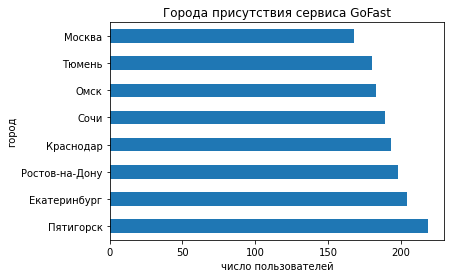

In [25]:
# визуализируем данные

data_users['city'].value_counts().plot.barh()

plt.title("Города присутствия сервиса GoFast")
plt.xlabel("число пользователей")
plt.ylabel("город")

Самый популярный город использования сервиса - Пятигорск.

##### Cоотношение пользователей с подпиской и без подписки

In [26]:
# выведем численные значения

data_users['subscription_type'].value_counts()

free     835
ultra    699
Name: subscription_type, dtype: int64

[None, None, None, None]

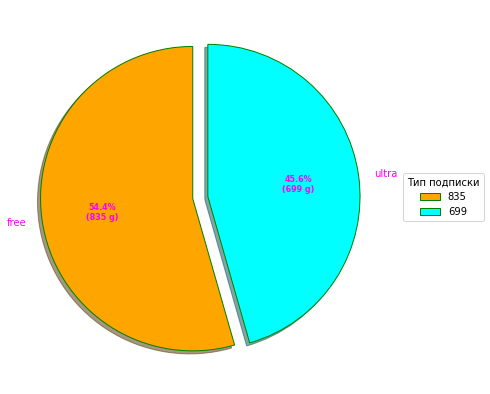

In [27]:
# визуализируем данные


colors = ( "orange", "cyan")

explode = (0.1, 0.0)
 
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
 
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)


fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data_users['subscription_type'].value_counts(),
                                  autopct = lambda pct: func(pct, data_users['subscription_type'].value_counts()),
                                  labels = data_sub['subscription_type'],
                                  shadow = True,
                                  explode=explode,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="magenta"))

ax.legend(wedges, data_users['subscription_type'].value_counts(),
          title ="Тип подписки",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")

Число пользователей без подписки - 835 (54,4%), с подпиской - 699 (45,6%).

##### Возраст пользователей

In [28]:
# найдем в цифрах все возраста пользователей

data_users['age'].value_counts()

25    145
24    132
26    131
23    129
27    119
22    119
28    112
21     93
20     71
30     68
29     68
31     48
19     47
18     46
32     41
33     39
17     26
34     19
16     19
35     15
15     13
14      9
13      8
36      6
12      4
38      3
37      2
39      1
43      1
Name: age, dtype: int64

In [29]:
data_users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Text(0, 0.5, 'Число поездок')

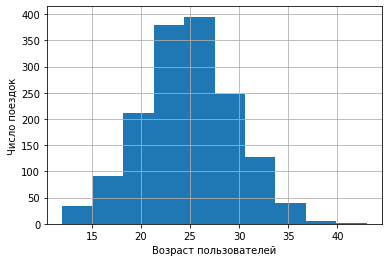

In [30]:
# построим гистограмму по возрасту пользователей

data_users['age'].hist(bins=10)
plt.xlabel("Возраст пользователей")
plt.ylabel("Число поездок")

Основные пользователи сервиса находятся в диапазоне возраста 17-30 лет. Средний возраст пользователей 24 года.

##### Расстояние, которое пользователь преодолел за одну поездку

Text(0, 0.5, 'Число поездок')

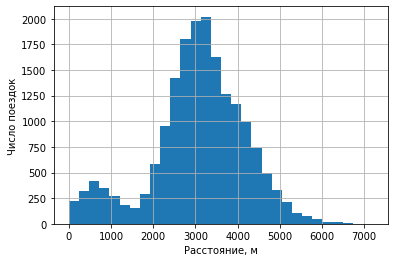

In [31]:
# построим гистограмму по расстоянию за поездку

data_rides['distance'].hist(bins=30)
plt.xlabel("Расстояние, м")
plt.ylabel("Число поездок")

* Большинство поездок лежит в диапазоне 2 - 5 км. 
* Часть поездок до 1 км. Тут могут быть разные причины. Возможно это новые пользователи, которые только протестировали сервис и им не понравилось. Возможно это пользователи наоборот постоянные и они делают часть очень коротких проездов, когда есть возможность.

##### Продолжительность поездок

Text(0, 0.5, 'Число поездок')

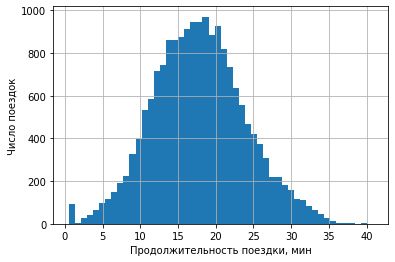

In [32]:
# построим гистограмму по продолжительности поездок

data_rides['duration'].hist(bins=50)
plt.xlabel("Продолжительность поездки, мин")
plt.ylabel("Число поездок")

Большинство поездок лежит в диапазоне времени 10 - 25 минут.

Выводы Шага 3 "Исследовательский анализ данных":

* Самый популярный город использования сервиса - Пятигорск. Самые непопулярный - Москва.
* Число пользователей без подписки - 835 (54,4%), с подпиской - 699 (45,6%).
* Основные пользователи сервиса находятся в диапазоне возраста 17-30 лет. Средний возраст пользователей - 24 года.
* Большинство поездок лежит в диапазоне 2 - 5 км. Есть небольшой пик поездок до 1 км.
* Большинство поездок лежит в диапазоне времени 10 - 25 минут.

#### Шаг 4. Объединение данных

##### Объедините данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge().

In [33]:
# Объединим сначала таблицы  data_users и data_rides по столбцу user_id  в таблицу data_total

data_total = data_users.merge(data_rides, on='user_id', how='outer')

data_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month_date         18068 non-null  int64         
 9   year_date          18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 1.5+ MB


In [34]:
data_total.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month_date,year_date
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,2021
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,2021
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,2021
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,2021
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,2021


In [35]:
# Объединим сначала таблицы  data_total и data_sub по столбцу subscription_type в  data_total

data_total = data_total.merge(data_sub, on='subscription_type', how='outer')

data_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month_date         18068 non-null  int64         
 9   year_date          18068 non-null  int64         
 10  minute_price       18068 non-null  int64         
 11  start_ride_price   18068 non-null  int64         
 12  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(7), object(3)
memory 

In [36]:
data_total.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month_date,year_date,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,2021,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,2021,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,2021,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,2021,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,2021,6,0,199


Проверим размерности таблиц до объединения и после, чтобы убедиться, что мы ничего не потеряли.

In [37]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 60.0+ KB


In [38]:
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     18068 non-null  int64         
 1   distance    18068 non-null  float64       
 2   duration    18068 non-null  float64       
 3   date        18068 non-null  datetime64[ns]
 4   month_date  18068 non-null  int64         
 5   year_date   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 847.1 KB


In [39]:
data_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


In [40]:
data_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month_date         18068 non-null  int64         
 9   year_date          18068 non-null  int64         
 10  minute_price       18068 non-null  int64         
 11  start_ride_price   18068 non-null  int64         
 12  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(7), object(3)
memory 

Мы получили таблицу в 13 столбцов и 18068 строк. Данные не потеряны. 

##### Создайте ещё два датафрейма из датафрейма, созданного на этапе 4.1

In [41]:
# выделим в отдельный датафрейм пользователей с подпиской

data_users_ultra = data_total[data_total['subscription_type'] == 'ultra']

data_users_ultra.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month_date,year_date,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,2021,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,2021,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,2021,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,2021,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,2021,6,0,199


In [42]:
data_users_ultra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6500 entries, 0 to 6499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6500 non-null   int64         
 1   name               6500 non-null   object        
 2   age                6500 non-null   int64         
 3   city               6500 non-null   object        
 4   subscription_type  6500 non-null   object        
 5   distance           6500 non-null   float64       
 6   duration           6500 non-null   float64       
 7   date               6500 non-null   datetime64[ns]
 8   month_date         6500 non-null   int64         
 9   year_date          6500 non-null   int64         
 10  minute_price       6500 non-null   int64         
 11  start_ride_price   6500 non-null   int64         
 12  subscription_fee   6500 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(7), object(3)
memory us

In [43]:
# выделим в отдельный датафрейм пользователей без подписки

data_users_free = data_total[data_total['subscription_type'] == 'free']

data_users_free.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month_date,year_date,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,2021,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,2021,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,2021,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,2021,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,2021,8,50,0


In [44]:
data_users_free.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11568 entries, 6500 to 18067
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            11568 non-null  int64         
 1   name               11568 non-null  object        
 2   age                11568 non-null  int64         
 3   city               11568 non-null  object        
 4   subscription_type  11568 non-null  object        
 5   distance           11568 non-null  float64       
 6   duration           11568 non-null  float64       
 7   date               11568 non-null  datetime64[ns]
 8   month_date         11568 non-null  int64         
 9   year_date          11568 non-null  int64         
 10  minute_price       11568 non-null  int64         
 11  start_ride_price   11568 non-null  int64         
 12  subscription_fee   11568 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(7), object(3)
memo

##### Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.

Text(0, 0.5, 'Число поездок')

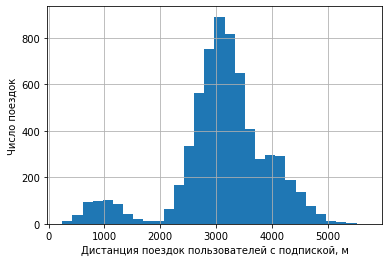

In [45]:
# Визуализируем информацию о расстоянии и времени поездок для пользователей с подпиской.

data_users_ultra['distance'].hist(bins=30)
plt.xlabel("Дистанция поездок пользователей с подпиской, м")
plt.ylabel("Число поездок")

Text(0, 0.5, 'Число поездок')

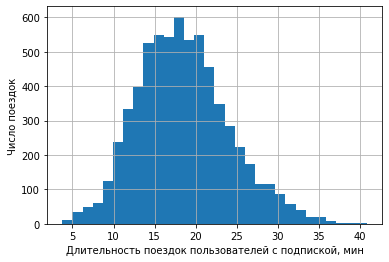

In [46]:
data_users_ultra['duration'].hist(bins=30)
plt.xlabel("Длительность поездок пользователей с подпиской, мин")
plt.ylabel("Число поездок")

Text(0, 0.5, 'Число поездок')

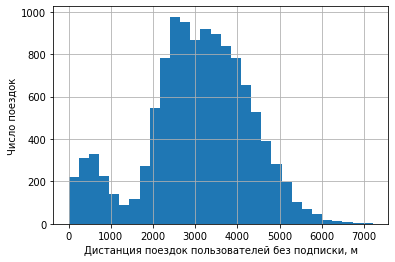

In [47]:
# Визуализируем информацию о расстоянии и времени поездок для пользователей без подписки.

data_users_free['distance'].hist(bins=30)
plt.xlabel("Дистанция поездок пользователей без подписки, м")
plt.ylabel("Число поездок")

Text(0, 0.5, 'Число поездок')

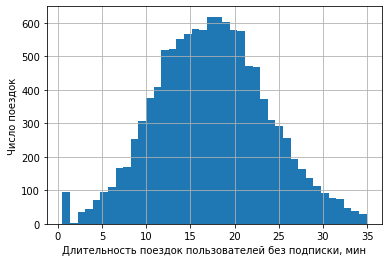

In [48]:
data_users_free['duration'].hist(bins=40)
plt.xlabel("Длительность поездок пользователей без подписки, мин")
plt.ylabel("Число поездок")

Сделаем наложение графиков для пользователей с подпиской и без.

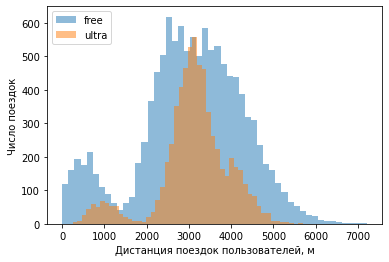

In [49]:
plt.hist(data_users_free['distance'], 50, alpha = 0.5, label='free')
plt.hist(data_users_ultra['distance'], 50, alpha = 0.5, label='ultra')
plt.legend(loc='upper left')

plt.xlabel("Дистанция поездок пользователей, м")
plt.ylabel("Число поездок")
plt.show()

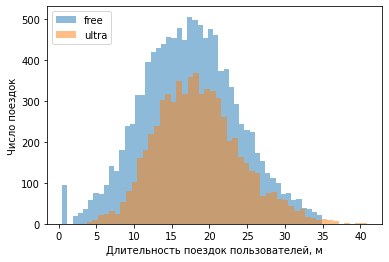

In [50]:
plt.hist(data_users_free['duration'], 50, alpha = 0.5, label='free')
plt.hist(data_users_ultra['duration'], 50, alpha = 0.5, label='ultra')
plt.legend(loc='upper left')

plt.xlabel("Длительность поездок пользователей, м")
plt.ylabel("Число поездок")
plt.show()

Выводы Шага 4 "Объединение данных":
   
* Среди пользователей без подписки количество поездок на расстояние до 1 км выше примерно в 3 раза
* Пользователи без подписки в основном ездят на расстояния 2-4 км, пользователи с подпиской 2.5-3.5 км
* Пик графика расстояний пользователей без подписки очень широкий - от 0 до 7 км, тогда как пользователи с подпиской в основном ездят на одно и тоже расстояние в 3 км и редко дальше 5 км.
* По длительности поездки основное время пользователей с подпиской и без примерно совпадает - 10-25 минут, но у пользователей без подписки больше коротких поездок. 
* Так же есть небольшой пик поездок у пользователей без подписки на отрезке до 2.5. минут. Вероятно, это пользователи, которым или не понравился сервис или были проблемы с самокатами. Нужно изучить этот вопрос дополнительно.


#### Шаг 5. Подсчёт выручки

##### Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4:найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [51]:
# узнаем, за сколько месяцев идет расчет

data_total['month_date'].unique()

array([ 1,  4,  8, 10, 11, 12,  3,  6,  7,  2,  5,  9])

In [52]:
data_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month_date         18068 non-null  int64         
 9   year_date          18068 non-null  int64         
 10  minute_price       18068 non-null  int64         
 11  start_ride_price   18068 non-null  int64         
 12  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(7), object(3)
memory 

In [53]:
# округлим длительность каждой поездки до целой минуты

data_total['duration'] = np.ceil(data_total['duration'])

data_total.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month_date,year_date,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1,2021,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1,2021,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4,2021,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8,2021,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8,2021,6,0,199


In [54]:
data_sum_total =data_total.pivot_table(
    index=['month_date', 'user_id', 'subscription_type','minute_price', 'start_ride_price', 'subscription_fee'], aggfunc={'distance':['sum','count'], 'duration': 'sum'}
)

data_sum_total.head()

distance  \
                                                                                       count   
month_date user_id subscription_type minute_price start_ride_price subscription_fee            
1          1       ultra             6            0                199                     2   
           3       ultra             6            0                199                     1   
           5       ultra             6            0                199                     1   
           7       ultra             6            0                199                     2   
           12      ultra             6            0                199                     1   

                                                                                                  \
                                                                                             sum   
month_date user_id subscription_type minute_price start_ride_price subscription_fee                
1          1       ultra             6            0                199               7027.511294   
           3       ultra             6            0                199               3061.777147   
           5       ultra             6            0                199               3914.646990   
           7       ultra             6            0                199               6478.080979   
           12      ultra             6            0                199               3577.151148   

                                                                                    duration  
                                                                                         sum  
month_date user_id subscription_type minute_price start_ride_price subscription_fee           
1          1       ultra             6            0                199                  42.0  
           3       ultra             6            0                199                  13.0  
           5       ultra             6            0                199                  13.0  
           7       ultra             6            0                199                  28.0  
           12      ultra             6            0                199                  33.0

In [55]:
# Для дальнейших подсчетов сделаем индексацию обычной, а не многоуровневой

data_sum_total.reset_index(inplace=True)

data_sum_total.head()

month_date user_id subscription_type minute_price start_ride_price  \
                                                                       
0          1       1             ultra            6                0   
1          1       3             ultra            6                0   
2          1       5             ultra            6                0   
3          1       7             ultra            6                0   
4          1      12             ultra            6                0   

  subscription_fee distance              duration  
                      count          sum      sum  
0              199        2  7027.511294     42.0  
1              199        1  3061.777147     13.0  
2              199        1  3914.646990     13.0  
3              199        2  6478.080979     28.0  
4              199        1  3577.151148     33.0

In [56]:
data_sum_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11331 entries, 0 to 11330
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   (month_date, )         11331 non-null  int64  
 1   (user_id, )            11331 non-null  int64  
 2   (subscription_type, )  11331 non-null  object 
 3   (minute_price, )       11331 non-null  int64  
 4   (start_ride_price, )   11331 non-null  int64  
 5   (subscription_fee, )   11331 non-null  int64  
 6   (distance, count)      11331 non-null  int64  
 7   (distance, sum)        11331 non-null  float64
 8   (duration, sum)        11331 non-null  float64
dtypes: float64(2), int64(6), object(1)
memory usage: 796.8+ KB


##### Добавьте столбец с помесячной выручкой, которую принёс каждый пользователь.

In [57]:
data_sum_total['user_id_count_money'] = (
    data_sum_total['start_ride_price'] * data_sum_total['distance','count'] +
    data_sum_total['minute_price'] * data_sum_total['duration', 'sum'] + 
    data_sum_total['subscription_fee']
)

data_sum_total.head()

month_date user_id subscription_type minute_price start_ride_price  \
                                                                       
0          1       1             ultra            6                0   
1          1       3             ultra            6                0   
2          1       5             ultra            6                0   
3          1       7             ultra            6                0   
4          1      12             ultra            6                0   

  subscription_fee distance              duration user_id_count_money  
                      count          sum      sum                      
0              199        2  7027.511294     42.0               451.0  
1              199        1  3061.777147     13.0               277.0  
2              199        1  3914.646990     13.0               277.0  
3              199        2  6478.080979     28.0               367.0  
4              199        1  3577.151148     33.0               397.0

#### Шаг 6. Проверка гипотез

#####  Тратят ли пользователи с подпиской больше времени на поездки?

Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Необходимо проверить эту гипотезу. Используем исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

У нас есть два датафрейма по поездкам пользователей с подпиской data_users_ultra и без - data_users_free

In [58]:
data_users_ultra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6500 entries, 0 to 6499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6500 non-null   int64         
 1   name               6500 non-null   object        
 2   age                6500 non-null   int64         
 3   city               6500 non-null   object        
 4   subscription_type  6500 non-null   object        
 5   distance           6500 non-null   float64       
 6   duration           6500 non-null   float64       
 7   date               6500 non-null   datetime64[ns]
 8   month_date         6500 non-null   int64         
 9   year_date          6500 non-null   int64         
 10  minute_price       6500 non-null   int64         
 11  start_ride_price   6500 non-null   int64         
 12  subscription_fee   6500 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(7), object(3)
memory us

In [59]:
data_users_free.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11568 entries, 6500 to 18067
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            11568 non-null  int64         
 1   name               11568 non-null  object        
 2   age                11568 non-null  int64         
 3   city               11568 non-null  object        
 4   subscription_type  11568 non-null  object        
 5   distance           11568 non-null  float64       
 6   duration           11568 non-null  float64       
 7   date               11568 non-null  datetime64[ns]
 8   month_date         11568 non-null  int64         
 9   year_date          11568 non-null  int64         
 10  minute_price       11568 non-null  int64         
 11  start_ride_price   11568 non-null  int64         
 12  subscription_fee   11568 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(7), object(3)
memo

In [60]:
# Округлим данные по столбцу duration в обеих датафреймах

data_users_ultra['duration'] = np.ceil(data_users_ultra['duration'])

data_users_free['duration'] = np.ceil(data_users_free['duration'])

data_users_ultra.head()

/tmp/ipykernel_123/1223624525.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_users_ultra['duration'] = np.ceil(data_users_ultra['duration'])
/tmp/ipykernel_123/1223624525.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_users_free['duration'] = np.ceil(data_users_free['duration'])


,user_id,name,age,city,subscription_type,distance,duration,date,month_date,year_date,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1,2021,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1,2021,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4,2021,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8,2021,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8,2021,6,0,199


In [61]:
data_users_free.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month_date,year_date,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,15.0,2021-01-02,1,2021,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,17.0,2021-02-01,2,2021,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,21.0,2021-02-04,2,2021,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,10.0,2021-02-10,2,2021,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,18.0,2021-02-14,2,2021,8,50,0


In [62]:
# Поездок пользователей без подписки почти в 2 раза больше, чем пользователями с подпиской. Поэтому сделаем случайную выборку
# того же размера, что и размер выборки поездок с подпиской

ultra_len = len(data_users_ultra.index)

data_users_free_part = data_users_free.sample(ultra_len)

data_users_free_part.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6500 entries, 15314 to 13655
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6500 non-null   int64         
 1   name               6500 non-null   object        
 2   age                6500 non-null   int64         
 3   city               6500 non-null   object        
 4   subscription_type  6500 non-null   object        
 5   distance           6500 non-null   float64       
 6   duration           6500 non-null   float64       
 7   date               6500 non-null   datetime64[ns]
 8   month_date         6500 non-null   int64         
 9   year_date          6500 non-null   int64         
 10  minute_price       6500 non-null   int64         
 11  start_ride_price   6500 non-null   int64         
 12  subscription_fee   6500 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(7), object(3)
memo

In [63]:
data_users_free_part.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month_date,year_date,minute_price,start_ride_price,subscription_fee
15314,1340,Влад,32,Краснодар,free,3292.397215,25.0,2021-01-24,1,2021,8,50,0
9814,946,Олег,29,Екатеринбург,free,2947.529448,14.0,2021-01-07,1,2021,8,50,0
14632,1289,Артемий,20,Краснодар,free,3021.135510,19.0,2021-04-09,4,2021,8,50,0
11962,1099,Назар,23,Тюмень,free,3143.864897,26.0,2021-01-06,1,2021,8,50,0
17527,1497,Антон,30,Сочи,free,3867.226577,24.0,2021-12-23,12,2021,8,50,0


In [64]:
data_users_ultra['duration'].describe()

count    6500.000000
mean       19.037692
std         5.577439
min         4.000000
25%        15.000000
50%        19.000000
75%        22.000000
max        41.000000
Name: duration, dtype: float64

In [65]:
data_users_free_part['duration'].describe()

count    6500.000000
mean       17.814000
std         6.291798
min         1.000000
25%        14.000000
50%        18.000000
75%        22.000000
max        35.000000
Name: duration, dtype: float64

Проверим гипотезу "Пользователи с подпиской тратят Больше времени на поездки, чем пользователи без подписки". 
Нулевая гипотеза, что среднее время поездок двух групп равно, альтернативное - что у подписчиков время на поездки тратится больше.

In [66]:
alpha = 0.01 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

sample_1 = data_users_ultra['duration']
sample_2 = data_users_free_part['duration']

results = st.ttest_ind(sample_1, sample_2, alternative='greater')

print('p-значение:', results.pvalue)
print('среднее значение продолжительности поездки пользователей без подписки:', data_users_free_part['duration'].mean())
print('среднее значение продолжительности поездки пользователей с подпиской:', data_users_ultra['duration'].mean())

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 6.179939494427882e-32
среднее значение продолжительности поездки пользователей без подписки: 17.814
среднее значение продолжительности поездки пользователей с подпиской: 19.037692307692307
Отвергаем нулевую гипотезу


Пользователи с подпиской вероятно тратят на поездки больше времени.

##### Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 

Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверим гипотезу.

In [67]:
data_users_ultra['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

Проверим гипотезу. Нулевая гипотеза, что среднее расстояние поездок равно 3130, альтернативное - что оно меньше этого расстояния.

In [68]:
interested_value = 3130
revenue = data_users_ultra['distance']

alpha = 0.05 # укажите уровень статистической значимости

results = st.ttest_1samp(
          revenue, 
          interested_value,
          alternative='less') # используйте метод st.ttest_1samp

print('p-значение:', results.pvalue)
print('среднее значение расстояния поездки пользователей без подписки:', data_users_free_part['distance'].mean())
print('среднее значение расстояния поездки пользователей с подпиской:', data_users_ultra['distance'].mean())

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.08046311521502146
среднее значение расстояния поездки пользователей без подписки: 3032.9745698963534
среднее значение расстояния поездки пользователей с подпиской: 3115.4453880370247
Не получилось отвергнуть нулевую гипотезу


Есть вероятность, что в среднем расстояние, которое проезжает пользователь с подпиской -  3130 метров.

##### Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

In [69]:
data_sum_total.head()

month_date user_id subscription_type minute_price start_ride_price  \
                                                                       
0          1       1             ultra            6                0   
1          1       3             ultra            6                0   
2          1       5             ultra            6                0   
3          1       7             ultra            6                0   
4          1      12             ultra            6                0   

  subscription_fee distance              duration user_id_count_money  
                      count          sum      sum                      
0              199        2  7027.511294     42.0               451.0  
1              199        1  3061.777147     13.0               277.0  
2              199        1  3914.646990     13.0               277.0  
3              199        2  6478.080979     28.0               367.0  
4              199        1  3577.151148     33.0               397.0

In [70]:
data_sum_total[data_sum_total['subscription_type'] == 'ultra']['user_id_count_money'].describe()

count    4533.000000
mean      362.792191
std        88.262737
min       223.000000
25%       301.000000
50%       337.000000
75%       409.000000
max       955.000000
Name: user_id_count_money, dtype: float64

In [71]:
data_sum_total[data_sum_total['subscription_type'] == 'free']['user_id_count_money'].describe()

count    6798.000000
mean      328.641365
std       183.868330
min        58.000000
25%       194.000000
50%       274.000000
75%       428.000000
max      1444.000000
Name: user_id_count_money, dtype: float64

Проверим гипотезу "Пользователи с подпиской приносят больший доход по месяцам". 
Нулевая гипотеза - средние доходы от двух групп равны, альтернативное - что у подписчики приносят больше дохода.

In [72]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

sample_1 = data_sum_total[data_sum_total['subscription_type'] == 'ultra']['user_id_count_money']
sample_2 = data_sum_total[data_sum_total['subscription_type'] == 'free']['user_id_count_money']

results = st.ttest_ind(sample_1, sample_2, alternative='greater')

print('p-значение:', results.pvalue)
print('среднее значение дохода в месяц от пользователей без подписки:',sample_2.mean())
print('среднее значение дохода в месяц от пользователей с подпиской:', sample_1.mean())

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.8850394384715216e-31
среднее значение дохода в месяц от пользователей без подписки: 328.6413651073845
среднее значение дохода в месяц от пользователей с подпиской: 362.7921906022502
Отвергаем нулевую гипотезу


Высока вероятность, что выручка от подписчиков не равна выручке от не подписчиков или выше нее по месяцам.

##### Ответ на вопрос пункта 6.4.

Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Чтобы проверить гипотезу о равенстве средних двух генеральных совокупностей для зависимых (парных) выборок в Python,
применим метод scipy.stats.ttest_rel().

Выводы Шага 6 "Проверка гипотез":

* Пользователи с подпиской вероятно тратят на поездки больше времени.
* Есть вероятность, что в среднем расстояние, которое проезжает пользователь с подпиской - 3130 метров или больше.
* Высока вероятность, что выручка от подписчиков равна выручке от не подписчиков или меньше нее по месяцам.
* Ответ 4 пункта: метод scipy.stats.ttest_rel()

Перед началом работы было выполнено сделующее:
  
* Загрузка данных, создание трех таблиц по пользователям - data_users, по поездкам - data_drives, по подпиcкам - data_sub  
* Был изменен тип данных в столбце date датафреймa data_riders на datetime
* Был добавлен новый столбец mounth_date  в датафрейме data_riders с типом int
* Были удалены явные дубликаты в датафрейме data_users в количестве 31 строка
* Процент очищенных данных составляет 98% к предоставленным


Выводы Шага 3 "Исследовательский анализ данных":

* Самый популярный город использования сервиса - Пятигорск. Самые непопулярный - Москва.
* Число пользователей без подписки - 835 (54,4%), с подпиской - 699 (45,6%).
* Основные пользователи сервиса находятся в диапазоне возраста 17-30 лет. Средний возраст пользователей - 24 года.
* Большинство поездок лежит в диапазоне 2 - 5 км. Есть часть поездом до 1 км. Вероятно, это пользователи, которым или не понравился сервис или были проблемы с самокатами. Нужно изучить этот вопрос дополнительно.
* Большинство поездок лежит в диапазоне времени 10 - 25 минут.

Выводы Шага 4 "Объединение данных":
   
* Среди пользователей без подписки количество поездок на расстояние до 1 км выше примерно в 3 раза
* Пользователи без подписки в основном ездят на расстояния 2-4 км, пользователи с подпиской 2.5-3.5 км
* Пик графика расстояний пользователей без подписки очень широкий - от 0 до 7 км, тогда как пользователи с подпиской в основном ездят на одно и тоже расстояние в 3 км и редко дальше 5 км.
* По длительности поездки основное время пользователей с подпиской и без примерно совпадает - 10-25 минут, но у пользователей без подписки больше коротких поездок. 
* Так же есть небольшой пик поездок у пользователей без подписки на отрезке до 2.5. минут. Вероятно, это пользователи, которым или не понравился сервис или были проблемы с самокатами. Нужно изучить этот вопрос дополнительно.


Выводы Шага 5 "Подсчёт выручки"

* Созданы соответствующие таблицы согласно заданию.

Выводы Шага 6 "Проверка гипотез"

* Пользователи с подпиской вероятно тратят на поездки больше времени.
* Есть вероятность, что в среднем расстояние, которое проезжает пользователь с подпиской - 3130 метров или больше.
* Высока вероятность, что выручка от подписчиков не равна выручке от не подписчиков или выше нее по месяцам.
* Ответ 4 пункта: метод scipy.stats.ttest_rel()